### 3. Consumo mensual de gasolina

#### - Gasolina super
#### - Gasolina regular
#### - Gasolina diésel
#### - Gasolina licuado

#### a. Especifique inicio, fin y frecuencia

#### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

#### c. Desconmponga la serie. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionariedad en media y en varianza.

#### d. Determine si es necesario transformar la serie

#### e. Explique si no es estacionaria en media.

In [13]:
# Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_consumption = pd.read_csv('data/Consumption.csv')
df_consumption['Fecha'] = pd.to_datetime(df_consumption['Fecha'])
df_consumption['Anio'] = df_consumption['Fecha'].dt.year
df_import = pd.read_csv('data/Import.csv')
df_import['Fecha'] = pd.to_datetime(df_import['Fecha'])
df_import['Anio'] = df_import['Fecha'].dt.year

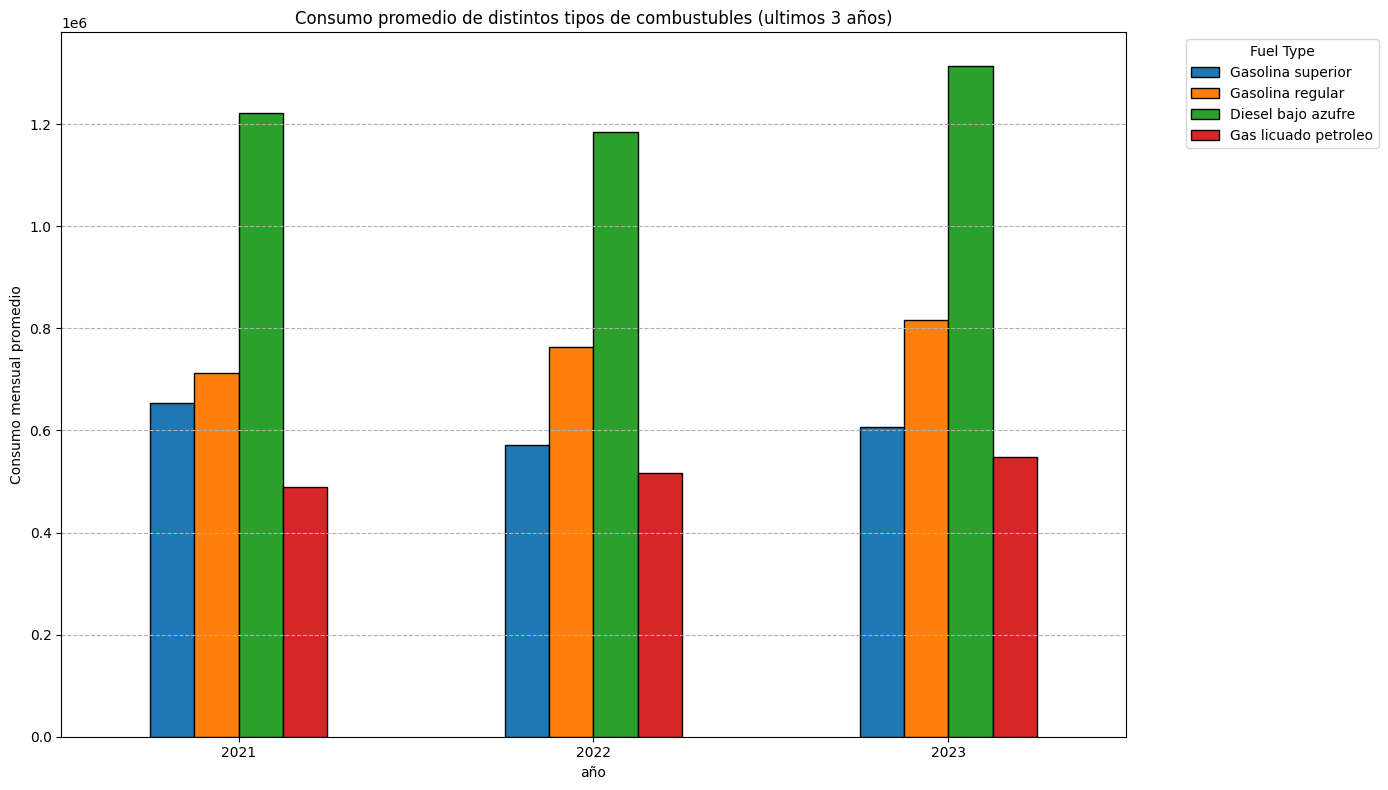

In [14]:
#consumo medio de gasolina al mes
import matplotlib.pyplot as plt

fuel_types_to_calculate = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Gas licuado petroleo",
]
latest_year = df_consumption['Anio'].max()


last_three_years_data = df_consumption[df_consumption['Anio'].isin([latest_year - 2, latest_year - 1, latest_year])]

average_monthly_consumption_last_three_years = last_three_years_data.groupby('Anio')[fuel_types_to_calculate].mean()

average_monthly_consumption_last_three_years.plot(kind='bar', figsize=(14, 8), edgecolor='black')

plt.title('Consumo promedio de distintos tipos de combustubles (ultimos 3 años)')
plt.xlabel('año')
plt.ylabel('Consumo mensual promedio')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



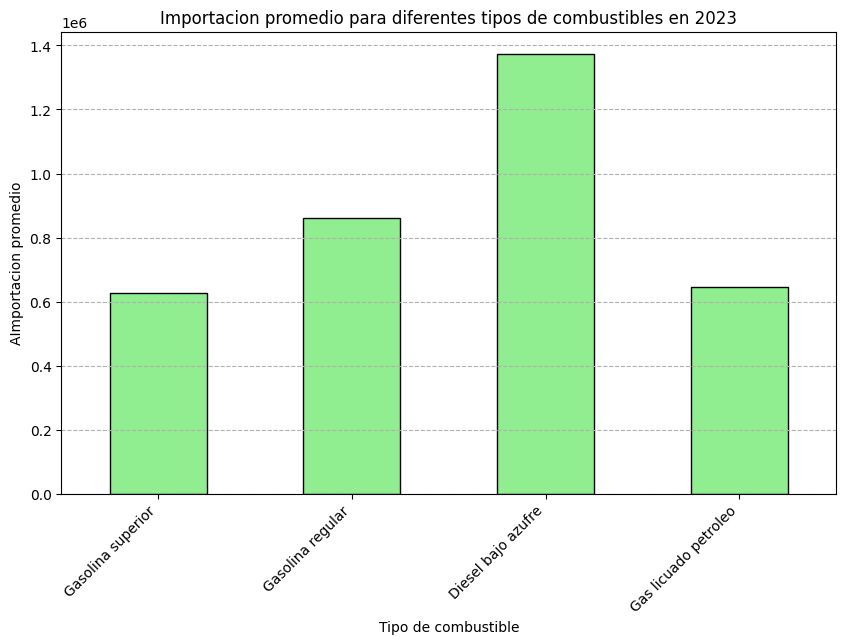

In [15]:
#Importacion promedio de combustibles
year_2023_import_data = df_import[df_import['Anio'] == 2023]

average_monthly_importation_2023 = year_2023_import_data[fuel_types_to_calculate].mean()

average_monthly_importation_2023.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')

plt.title('Importacion promedio para diferentes tipos de combustibles en 2023')
plt.xlabel('Tipo de combustible')
plt.ylabel('AImportacion promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


In [16]:
# i. Gráfica de autocorrelación y explicar la no estacionariedad en media.

ii. Valores estadísticos como la prueba de Dickey-Fuller. Aumentada para corroborar la no estacionarieda en media. 

¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

#### f.  Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA que utilizará para predecir. Explique en qué se basó para darle valor a estos parámetros, basándose en las funciones de autocorrelación y autocorrelación parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el modelo propuesto.

#### g.  Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

#### h.  Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

### 4. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción. En el caso de la serie de precios, use los datos de 2023 como conjunto de prueba

### 5. Haga una predicción para todo este año 2023 determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 6. Discuta cuál fue el comportamiento de las series durante la pandemia. ¿Qué tanto afectó las predicciones?¿se recuperaron los valores habituales en el regreso a la “nueva normalidad”?